<b>Tugas Praktikum Week 7</b> <br>
Jericho Cristofel Siahaya <br>
00000032932

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=7a0aeb9a231c2d2f2cd2d59e2ac8301a9f351146b787c7ee0692a37b61db4250
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt
import pandas as pd

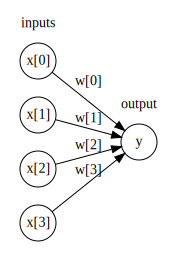

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

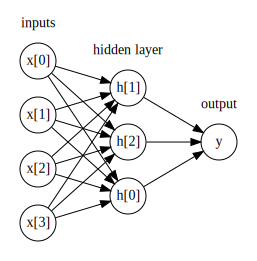

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0, 0.5, 'relu(x), tanh(x)')

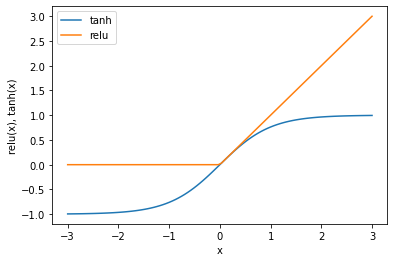

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line, 0), label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')

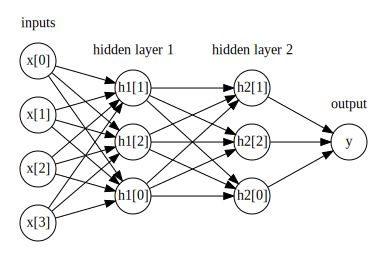

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

Tuning Neural Networks

Text(0, 0.5, 'Feature 1')

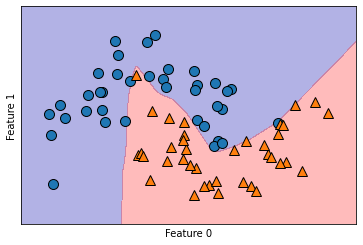

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

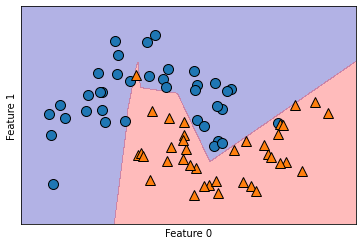

In [10]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

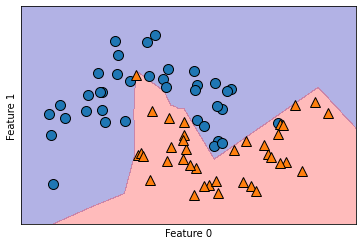

In [12]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

Text(0, 0.5, 'Feature 1')

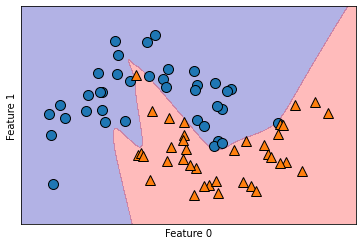

In [13]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(x_train, y_train)
mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3)
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


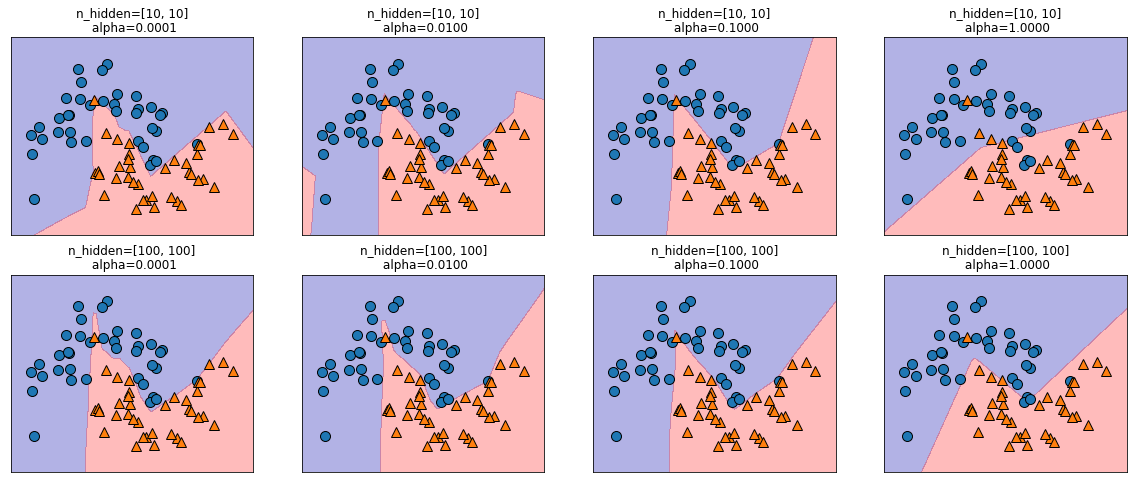

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
  for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
    mlp = MLPClassifier(solver='lbfgs', random_state=0,
                        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                        alpha=alpha)
    mlp.fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
    ax.set_title("n_hidden=[{}, {}]\n alpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

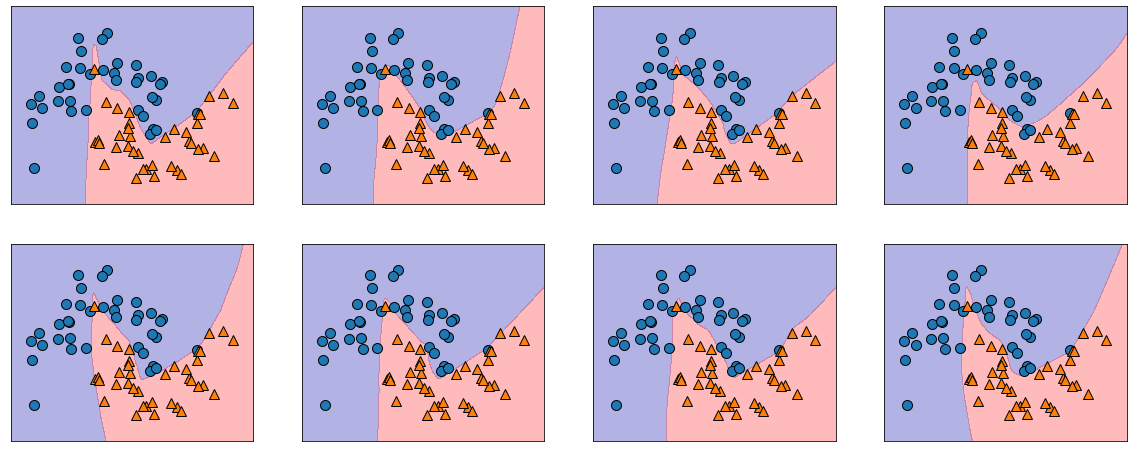

In [16]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
  mlp = MLPClassifier(solver='lbfgs', random_state=i,
                      hidden_layer_sizes=[100, 100])
  mlp.fit(x_train, y_train)
  mglearn.plots.plot_2d_separator(mlp, x_train, fill=True, alpha=.3, ax=ax)
  mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)

In [17]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("Cancer data per-feature maxima:n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:n[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

mlp = MLPClassifier(random_state=42)
mlp.fit(x_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(x_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(x_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


In [19]:
mean_on_train = x_train.mean(axis=0)
std_on_train = x_train.std(axis=0)

x_train_scaled = (x_train - mean_on_train) / std_on_train
x_test_scaled = (x_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(x_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.965


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [22]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(x_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(x_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(x_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


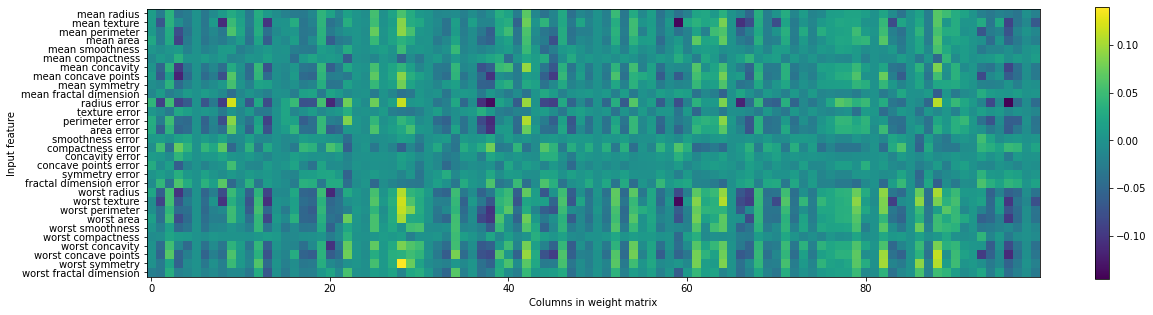

In [23]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

Uncertainty Estimates from Classifiers

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
x, y = make_circles(noise=0.25, factor=0.5, random_state=1)

y_named = np.array(['blue', 'red'])[y]

x_train, x_test, y_train_named, y_test_named, y_train, y_test = \
  train_test_split(x, y_named, y, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(x_train, y_train_named)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [26]:
print("x_test.shape: {}".format(x_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(x_test).shape))

x_test.shape: (25, 2)
Decision function shape: (25,)


In [27]:
print("Decision function:\n {}".format(gbrt.decision_function(x_test)[:6]))

Decision function:
 [ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [28]:
print("Thresholded decision function:\n {}".format(
    gbrt.decision_function(x_test) > 0
))
print("Predictions:\n {}".format(gbrt.predict(x_test)))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [30]:
greater_zero = (gbrt.decision_function(x_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is equal to predictions: {}".format(
    np.all(pred == gbrt.predict(x_test))
))

pred is equal to predictions: True


In [31]:
decision_function = gbrt.decision_function(x_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)
))

Decision function minimum: -7.69 maximum: 4.29


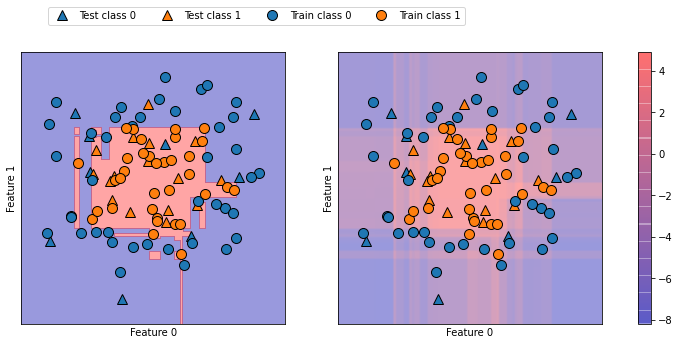

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, x, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
              "Train class 1"], ncol=4, loc=(.1, 1.1));


Predicting Probabilities

In [35]:
print("Shape of probability: {}".format(gbrt.predict_proba(x_test).shape))

Shape of probability: (25, 2)


In [36]:
print("Predicted probabilities:\n{}".format(
    gbrt.predict_proba(x_test[:6])
))

Predicted probabilities:
[[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]
 [0.02504637 0.97495363]]


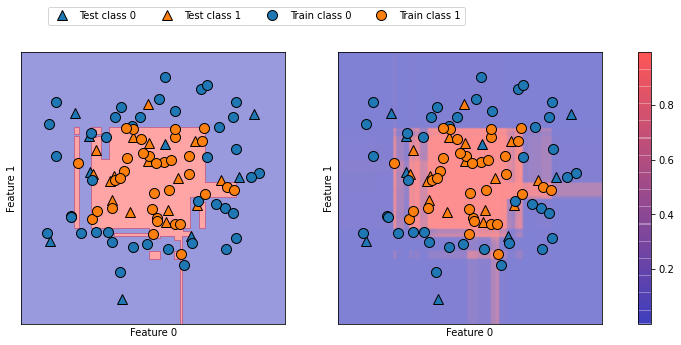

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, x, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, 
                                            x, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
for ax in axes:
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train,
                            markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
              "Train class 1"], ncol=4, loc=(.1, 1.1))


In [40]:
from sklearn.datasets import load_iris

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42
)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
print("Decision function shape: {}".format(gbrt.decision_function(x_test).shape))
print("Decision function:\n{}".format(gbrt.decision_function(x_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-1.9957153   0.04758118 -1.92721297]
 [ 0.0614655  -1.90755689 -1.92793177]
 [-1.99058105 -1.87637856  0.09686741]
 [-1.9957153   0.04758118 -1.92721297]
 [-1.99730166 -0.13469231 -1.20341532]
 [ 0.0614655  -1.90755689 -1.92793177]]


In [42]:
print("Argmax of decision function:\n{}".format(
    np.argmax(gbrt.decision_function(x_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(x_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [43]:
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(x_test)[:6]))
print("Sums: {}".format(gbrt.predict_proba(x_test)[:6].sum(axis=1)))

Predicted probabilities:
[[0.10217734 0.78840063 0.10942203]
 [0.7834712  0.1093673  0.1071615 ]
 [0.09818079 0.11005862 0.79176059]
 [0.10217734 0.78840063 0.10942203]
 [0.10360014 0.66723882 0.22916105]
 [0.7834712  0.1093673  0.1071615 ]]
Sums: [1. 1. 1. 1. 1. 1.]


In [45]:
print("Argmax of predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(x_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(x_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

named_target = iris.target_names[y_train]
logreg.fit(x_train, named_target)
print("unique classes in training data: {}".format(logreg.classes_))
print("predictions: {}".format(logreg.predict(x_test)[:10]))
argmax_dec_func = np.argmax(logreg.decision_function(x_test), axis=1)
print("argmax of decision function: {}".format(argmax_dec_func[:10]))
print("argmax combined with classes_: {}".format(
    logreg.classes_[argmax_dec_func][:10]))


unique classes in training data: ['setosa' 'versicolor' 'virginica']
predictions: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']
argmax of decision function: [1 0 2 1 1 0 1 2 1 1]
argmax combined with classes_: ['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
